In [1]:
import os

import numpy as np
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# GUI Features in OpenCV

## Getting Started with Images

### Read and display an image using Matplotlib

In [2]:
# http://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
img = cv2.imread(os.path.join("images", "ronaldo1.jpg"), cv2.IMREAD_COLOR)     # BGR image

In [3]:
img.shape

(400, 630, 3)

(-0.5, 629.5, 399.5, -0.5)

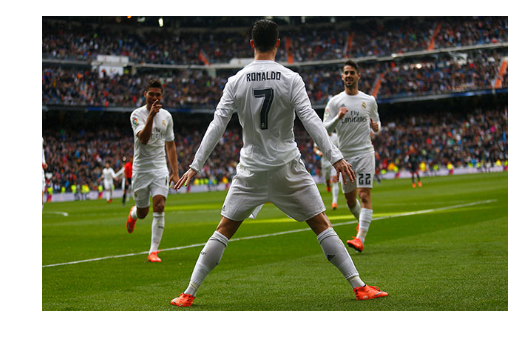

In [4]:
# img channel order: "BGR"
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.imshow(img)
plt.axis("off")

### Drawing functions in OpenCV

In [5]:
img2 = np.zeros((512, 512, 3), dtype=np.uint8)

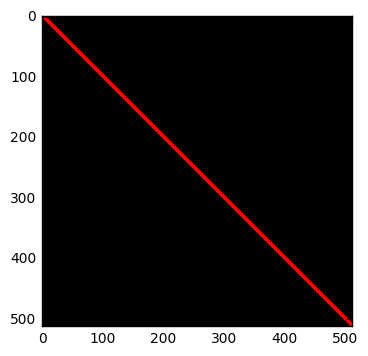

In [6]:
img2 = cv2.line(img2, (0,0), (511, 511), (255,0,0), 5)
plt.imshow(img2)

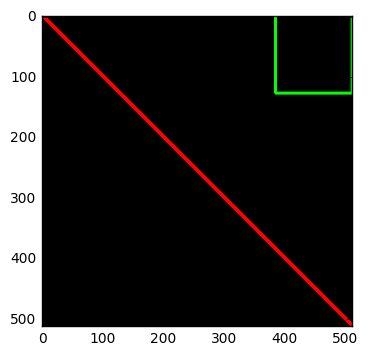

In [7]:
img2 = cv2.rectangle(img2, (384,0), (510,128), (0,255,0),3)
plt.imshow(img2)

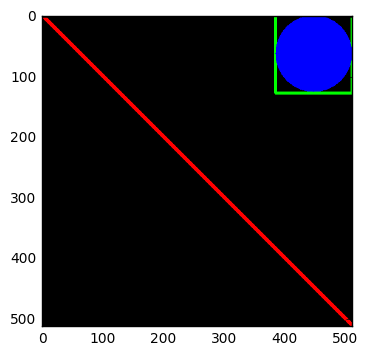

In [8]:
img2 = cv2.circle(img2, (447,63), 63, (0,0,255), -1)
plt.imshow(img2)

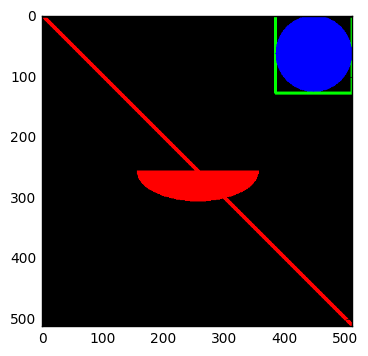

In [9]:
img2 = cv2.ellipse(img2, (256,256), (100,50), 0,0,180,(255,0,0),-1)   # cv2.ellipse(img, center_loc, [major, minor]axes_lengths, angle, startAngle, endAngle, color, thickness)
plt.imshow(img2)

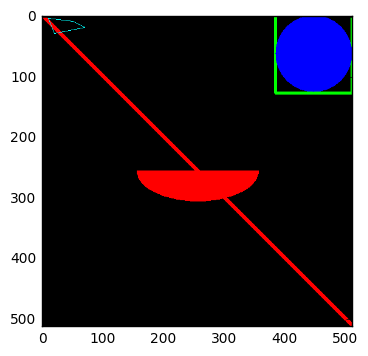

In [10]:
pts = np.array([[10,5], [20,30], [70,20], [50,10]], dtype=np.int32)
pts = pts.reshape((-1,1,2))    # pts.shape: (num_vertices, 1, 2)
img2 = cv2.polylines(img2, [pts], True, (0,255,255))
plt.imshow(img2)

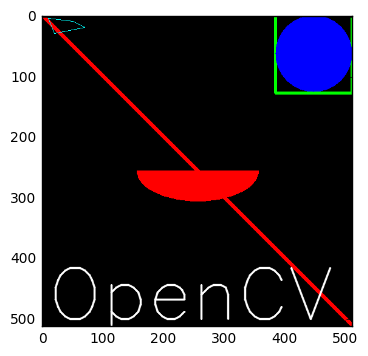

In [11]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img2, "OpenCV", (10,500), font, 4, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(img2)

# Core Operations

## Basic Operation on Images

### Accessing and Modifying pixel values 

In [12]:
px = img[100, 100]
print(px)

[45 41 53]


In [13]:
# accessing only blue pixel
img[100, 100] = [255, 255, 255]
print(img[100, 100])

[255 255 255]


In [14]:
img.item(10,10,2)

24

In [15]:
img.itemset((10,10,2),100)
img.item(10,10,2)

100

### Accessing Image Properties

In [16]:
print(img.shape)
print(img.size)
print(img.dtype)

(400, 630, 3)
756000
uint8


### Image ROI (Region of Interest)

In [17]:
# http://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
img = cv2.imread(os.path.join("images", "ronaldo1.jpg"), cv2.IMREAD_COLOR)     # BGR image

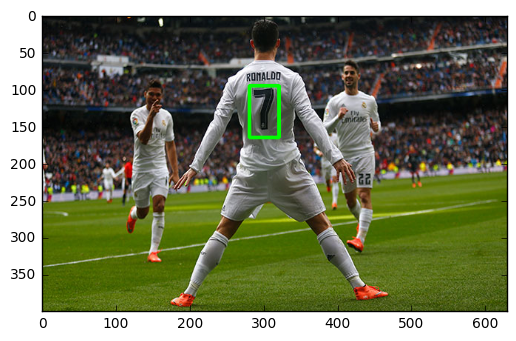

In [18]:
img2 = cv2.rectangle(img, (280, 95), (320, 165), (0,255,0),3)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [19]:
number = img[95:165, 280:320]
img[300:370, 500:540] = number

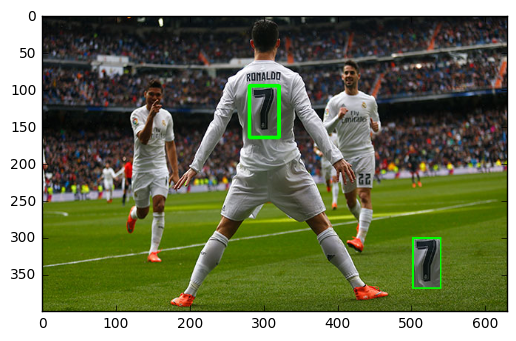

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Splitting and Merging Image Channels

In [26]:
img = cv2.imread(os.path.join("images", "ronaldo1.jpg"), cv2.IMREAD_COLOR)     # BGR image

In [22]:
b, g, r = cv2.split(img)
img = cv2.merge((b,g,r))

In [23]:
print(b.shape, g.shape, r.shape)

(400, 630) (400, 630) (400, 630)


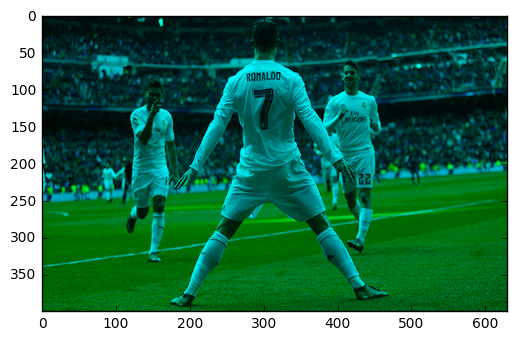

In [27]:
img[:, :, 2] = 0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Arithmetic Operations on Images

### Image Addition

In [28]:
x = np.uint8([250])
y = np.uint8([10])

In [29]:
print(cv2.add(x,y))
print(x+y)

[[255]]
[4]


### Image Blending

In [38]:
img1 = cv2.imread(os.path.join("images", "ronaldo1.jpg"), cv2.IMREAD_COLOR)
img2 = cv2.imread(os.path.join("images", "messi1.jpg"), cv2.IMREAD_COLOR)

In [39]:
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

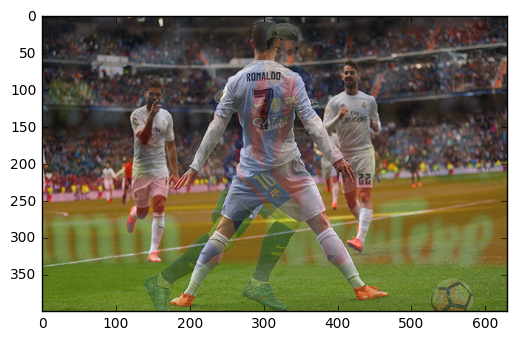

In [40]:
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

### Bitwise Operations

In [41]:
# Load two images
img1 = cv2.imread(os.path.join("images", "messi1.jpg"))
img2 = cv2.imread(os.path.join("images", "opencv_logo.png"))

In [53]:
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

In [54]:
# Create a mask of logo and create its inverse mask
# http://docs.opencv.org/3.0-alpha/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
# cv2.threshold(src, thresh, maxval, type[, dst]) -> retval, dst
mask_inv = cv2.bitwise_not(mask)

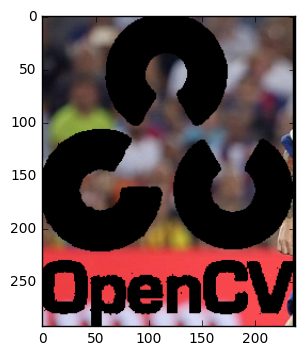

In [67]:
# Black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
plt.imshow(cv2.cvtColor(img1_bg, cv2.COLOR_BGR2RGB))

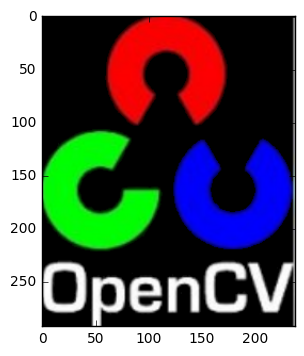

In [68]:
# Take only region of logo from logo image
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)
plt.imshow(cv2.cvtColor(img2_fg, cv2.COLOR_BGR2RGB))

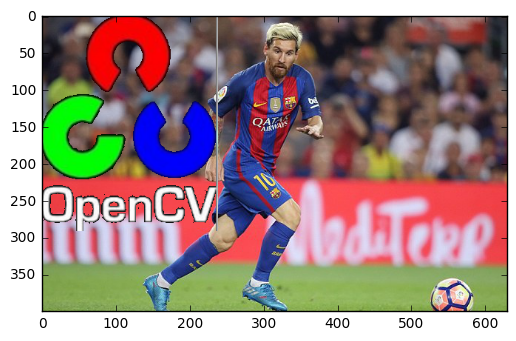

In [69]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

# Image Processing in OpenCV

## Changing Colorspaces

### Changing Color-space

In [74]:
img = cv2.imread(os.path.join("images", "messi1.jpg"))
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

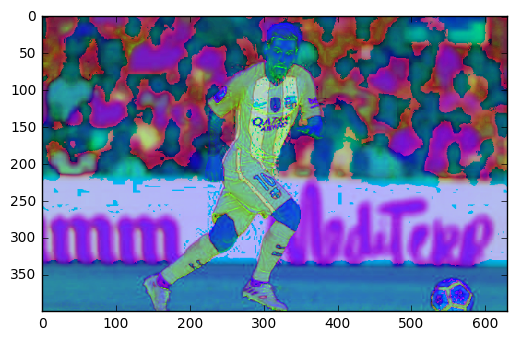

In [79]:
plt.imshow(img_hsv, cmap="hsv")

In [73]:
# Flags for changing colorspace
flags = [i for i in dir(cv2) if i.startswith("COLOR_")] 
# dir(): return all the list of names in the current local scope
print(len(flags))
print(flags[:20])

258
['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA']


### Object Tracking

In [112]:
cap = cv2.VideoCapture(0)  # Create a VideoCapture object (index: the number to specify which camera)

# Capture frame-by-frame
_, frame = cap.read()

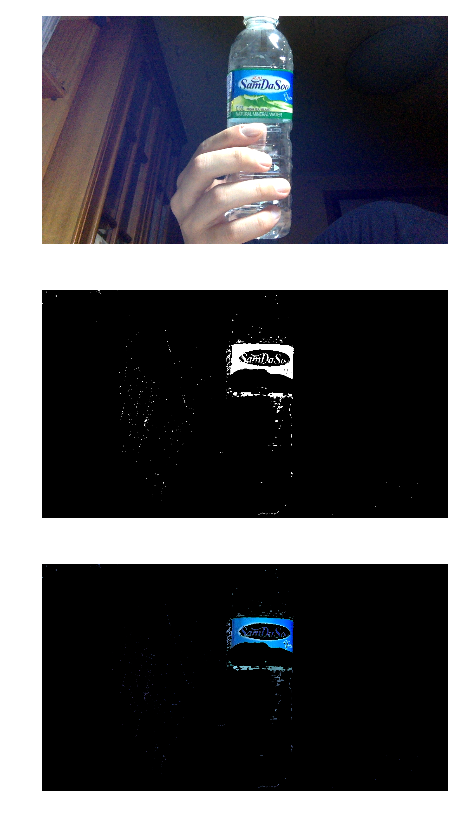

In [116]:
# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_blue = np.array([90, 100, 100])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame, frame, mask=mask)


fig, axes = plt.subplots(3, 1, figsize=(20, 10))
axes[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
axes[1].imshow(mask, cmap="gray")
axes[2].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
for ax in axes:
    ax.axis("off")

In [117]:
cap.release()

## Image Thresholding

### Simple Thresholding

In [118]:
"""
Different types of thresholding:
cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_TRUNC
cv2.THRESH_TOZERO
cv2.THRESH_TOZERO_INV
"""

'\nDifferent types of thresholding:\ncv2.THRESH_BINARY\ncv2.THRESH_BINARY_INV\ncv2.THRESH_TRUNC\ncv2.THRESH_TOZERO\ncv2.THRESH_TOZERO_INV\n'

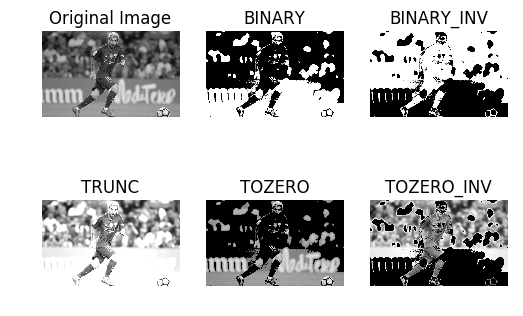

In [123]:
img = cv2.imread(os.path.join("images", "messi1.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ["Original Image", "BINARY", "BINARY_INV", 
             "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

### Adaptive Thresholding

In [124]:
"""
Adaptive Method - It decides how thresholding value is calculated.
cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
"""

'\nAdaptive Method - It decides how thresholding value is calculated.\ncv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.\ncv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.\n'

In [133]:
cv2.adaptiveThreshold?

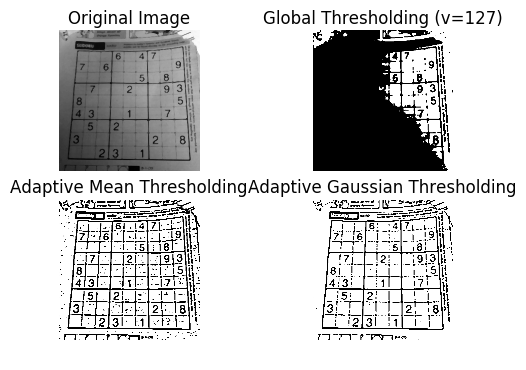

In [140]:
img = cv2.imread(os.path.join("images", "dave.jpg"), cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img, 5)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.axis("off")
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                           cv2.THRESH_BINARY, 11, 2)
# cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
#   blockSize: size of a pixel neighborhood that is used to calculate a threshold value for the pixel
#   C: constant subtracted from the mean or weighted mean
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                           cv2.THRESH_BINARY, 11, 2)

titles = ["Original Image", "Global Thresholding (v=127)", 
             "Adaptive Mean Thresholding", "Adaptive Gaussian Thresholding"]
images = [img, th1, th2, th3]

fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

### Otsu's Binarization

In [ ]:
# TODO